# Android App Market Analysis - What Makes an App Popular?
## Intermediate Progress

*95-885 Data Science and Big Data - Project 1: Exploratory Data Analysis*

**Team 15<br>
Daniel You (sangwony)<br>
Jiaxuan Zhang (jiaxuanz)<br>
Yuran Zhu (yuranz)**

### Content
[1. Overview](#Overview)<br>
[2. Data Preprocessing](#Data-Preprocessing)<br>
[3. App Rating Analysis](#App-Rating-Analysis)<br>
[4. App Price Analysis](#App-Price-Analysis)<br>
[5. App Size Analysis](#App-Size-Analysis)<br>
[6. Future Work](#Future-Work)

# Overview

With the dataset, we expect to answer the following questions that are interesting to both app developers and users. 

1. What categories of apps are most available/popular?
2. Do paid apps perform better than free apps? For paid apps, do those with higher ratings commonly have a price in a reasonable range? What categories tend to set higher prices?
3. Do users prefer apps with lighter size? That is to say, for each category, are top-rated apps tend to have less size? Can we find a reasonable range of an app size?
4. Among current apps, which categories receive the most positive reviews? What factors make an app positively/negatively evaluated? 

So far, we have finished exploring the **first 3 questions** and come up with some business insights. More details can be found in Section 3-5. We'll use the remained days to figure out the last one.

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Inspect

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

First to have a look at `Category`.

In [5]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

It seems that `1.9` is a wrong category type, let's find this record. 

In [6]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Actually, the category of this app is missing and all other values are pushed left for one column. Since our user reviews dataset is generated based on categories listed in `df`, we cannot propoerly assign the correct category for this app. Therefore, we'll drop this app record.

The same wrong category recorded here. Therefore, we'll drop this app record.

In [7]:
df.drop(10472, inplace = True)
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

## 2. Covert Data Types

In [8]:
df['Rating'] = df['Rating'].astype(float)
df['Reviews'] = df['Reviews'].astype(int)

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
# For uncertain sizes, code as NaN
df['Size'].replace('Varies with device', np.nan, inplace = True)

# Convert k/M to int, use MB as unit
df['unit'] = df['Size'].str[-1]
df['unit'].replace('k', 10**(-3), inplace = True)
df['unit'].replace('M', 1, inplace = True)
df['Size'] = df['Size'].str.replace(r'[kM]', '').astype(float) * df['unit']
df.drop(['unit'], axis = 1, inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [12]:
# Convert `Installs` to int type
df['Installs'] = df['Installs'].str.replace(r'[,+]','').astype(int)
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [13]:
# Convert `Price` to float type
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
# Expoer cleaned dataset
df.to_csv(r'cleaned_googleplaystore.csv', index = False)

In [16]:
df = pd.read_csv("cleaned_googleplaystore.csv")

In [17]:
# Numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0000,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0000,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.151653e+01,2.258875e+01,0.0085,4.9,13.0,30.0,1.000000e+02
Installs,10840.0,1.546434e+07,8.502936e+07,0.0000,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0000,0.0,0.0,0.0,4.000000e+02


In [18]:
# Categorical variables
df.describe(exclude = np.number).transpose()

,count,unique,top,freq
App,10840,9659,ROBLOX,9
Category,10840,33,FAMILY,1972
Type,10839,2,Free,10039
Content Rating,10840,6,Everyone,8714
Genres,10840,119,Tools,842
Last Updated,10840,1377,"August 3, 2018",326
Current Ver,10832,2831,Varies with device,1459
Android Ver,10838,33,4.1 and up,2451


#  App Rating Analysis

## 1. App availability

First, let's visualize the app counts grouped by categories to see what categories have most apps available.

Text(0.5, 1.0, 'Number of counts on Category')

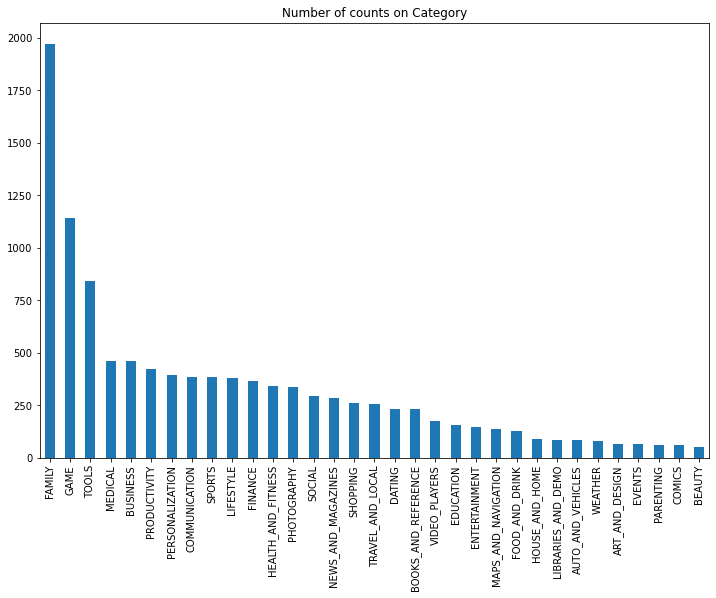

In [19]:
plt.figure(figsize = (12,8))
df['Category'].value_counts().plot.bar()
#plt.yscale('log')
plt.title('Number of counts on Category')

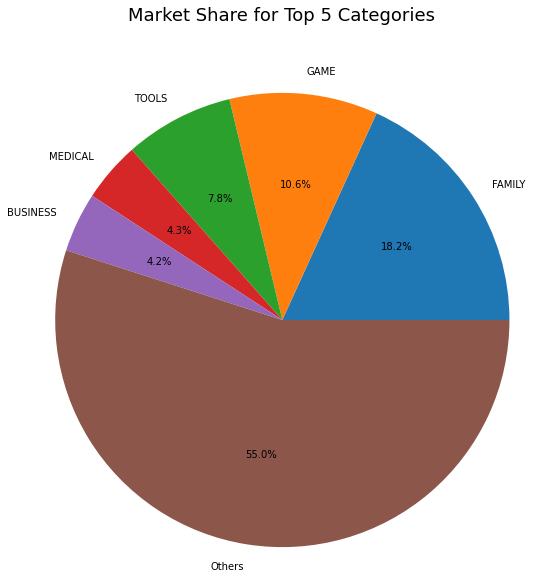

In [20]:
labels = list(df['Category'].value_counts().index[:5])
labels.append('Others')
shares = list(df['Category'].value_counts().values[:5])
shares.append(sum(df['Category'].value_counts().values[5:]))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.pie(shares, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  

plt.title('Market Share for Top 5 Categories', y = 1.1, fontsize = 18)
plt.show()

It's apprent that `Family` and `Game` apps have the highest share of apps in the Android market, they totally take up 28.8
% market share. Besides,
`Tools`, `Medical` and `Business` apps also have larger number of apps available for users.

## 2. App rating

Text(0.5, 1.0, 'Number of counts on Rating')

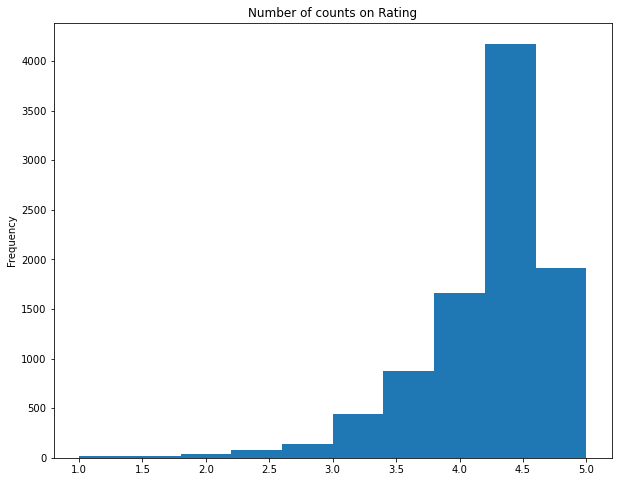

In [21]:
plt.figure(figsize = (10,8))
df['Rating'].plot.hist()
plt.title('Number of counts on Rating')

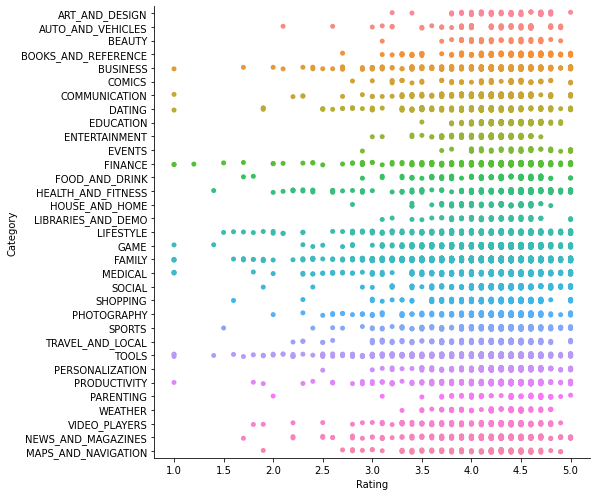

In [22]:
sns.catplot(x="Rating", y="Category", data=df, height=7, aspect=1.2)

Moreover, we sort app categories based on rating data. When we are deciding on which application category will have the highest probability of beings succesful, we took into acount the **mean score** of `Rating` and the **total number of times** it has been rated by users. Mean score was used because the `Rating` ranges from 1 to 5, so there is no outliers. Number of times it was rated was taken into account because categories, such as `Beauty` and `Events` scored highly on the mean score but was rated by only few dozens of users compared to `Family` category which was rated over 1,000 times.

In [23]:
df_group = df.groupby('Category').agg({'Rating': ['mean', 'min', 'max','count']})
df_group = df_group.sort_values(by=[('Rating', 'count'),('Rating', 'mean')],ascending=[False,False])
df_group

Rating                
                         mean  min  max count
Category                                     
FAMILY               4.192272  1.0  5.0  1747
GAME                 4.286326  1.0  5.0  1097
TOOLS                4.047411  1.0  5.0   734
PRODUCTIVITY         4.211396  1.0  5.0   351
MEDICAL              4.189143  1.0  5.0   350
COMMUNICATION        4.158537  1.0  5.0   328
FINANCE              4.131889  1.0  5.0   323
SPORTS               4.223511  1.5  5.0   319
PHOTOGRAPHY          4.192114  2.0  5.0   317
PERSONALIZATION      4.335987  2.5  5.0   314
LIFESTYLE            4.094904  1.5  5.0   314
BUSINESS             4.121452  1.0  5.0   303
HEALTH_AND_FITNESS   4.277104  1.4  5.0   297
SOCIAL               4.255598  1.9  5.0   259
SHOPPING             4.259664  1.6  5.0   238
NEWS_AND_MAGAZINES   4.132189  1.7  5.0   233
TRAVEL_AND_LOCAL     4.109292  2.2  5.0   226
DATING               3.970769  1.0  5.0   195
BOOKS_AND_REFERENCE  4.346067  2.7  5.0   178
VIDEO_PLAYERS        4.063750  1.8  4.9   160
EDUCATION            4.389032  3.5  4.9   155
ENTERTAINMENT        4.126174  3.0  4.7   149
MAPS_AND_NAVIGATION  4.051613  1.9  4.9   124
FOOD_AND_DRINK       4.166972  1.7  5.0   109
HOUSE_AND_HOME       4.197368  2.8  4.8    76
WEATHER              4.244000  3.3  4.8    75
AUTO_AND_VEHICLES    4.190411  2.1  4.9    73
LIBRARIES_AND_DEMO   4.178462  3.1  5.0    65
ART_AND_DESIGN       4.358065  3.2  5.0    62
COMICS               4.155172  2.8  5.0    58
PARENTING            4.300000  2.0  5.0    50
EVENTS               4.435556  2.9  5.0    45
BEAUTY               4.278571  3.1  4.9    42

Based on this criteria, Top 5 apps were:
- `Family`
- `Game`
- `Tools`
- `Productivity`
- `Medical`

# App Price Analysis

For the first hypothesis regarding price, we suppose paid apps perform better than free apps, which can be replected by the rating. Followed by this idea, we calculate the **mean score** of `Rating` for each group (paird & free) and plot them into a bar chart.

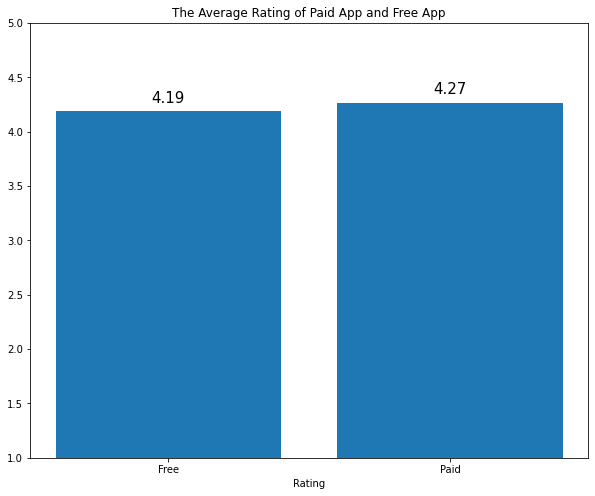

In [24]:
grouped=df['Rating'].groupby(df['Type'])

plt.figure(figsize = (10,8))
plt.bar(grouped.mean().index, grouped.mean().values)
plt.title('The Average Rating of Paid App and Free App')
plt.xlabel('Rating')
plt.ylim(1, 5)
for a,b in zip(grouped.mean().index,grouped.mean().values):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=15)
plt.show()

From the bar chart, we can see:
- The paid apps have a higher average rating than free apps.
- But the rating difference is small, which is less than `0.1`

Higher rating for the paid apps seems to be intuitive, since paid apps tend to have better design and provide favorable user experience. As for the rating difference, we can conduct a *hypothesis test* to determine the significance of the difference in the following analysis.

Second, we want to see if apps with higher ratings commonly have a price in a reasonable range. We first seperate the high-rating records (`Rating >= 4.0`) based on their rating with **0.2 interval** and visualize the corresponding price range.

Text(0.5, 1.0, 'Price Distribution for High-rating Apps')

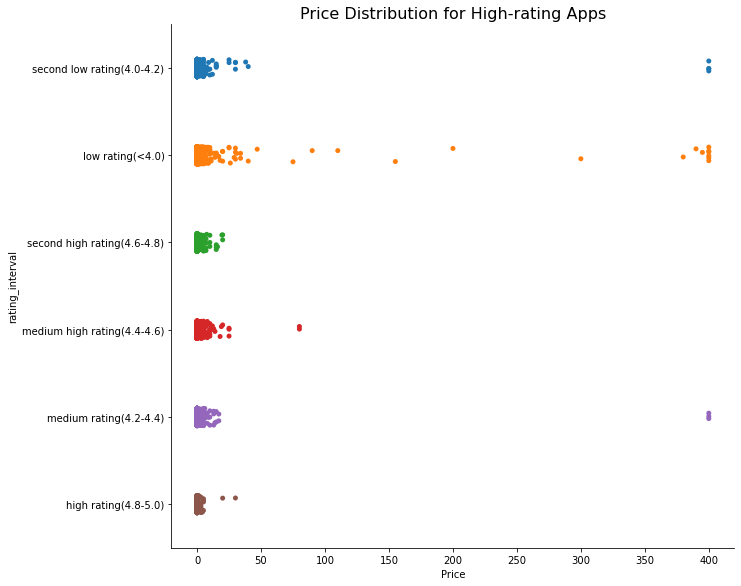

In [25]:
def interval(r):
    if r > 4.8 and r <= 5.0:
        return 'high rating(4.8-5.0)'
    elif r > 4.6 and r <= 4.8:
        return 'second high rating(4.6-4.8)'
    elif r > 4.4 and r <= 4.6:
        return 'medium high rating(4.4-4.6)'
    elif r > 4.2 and r <= 4.4:
        return 'medium rating(4.2-4.4)'
    elif r >= 4.0 and r <= 4.2:
        return 'second low rating(4.0-4.2)'
    else:
        return 'low rating(<4.0)'
df['rating_interval'] = df['Rating'].map(lambda x: interval(x))
sns.catplot(x="Price", y="rating_interval", data=df, height=8, aspect=1.3)
plt.title('Price Distribution for High-rating Apps', fontsize = 16)

From the scatter plot above, we can see that higher rating apps tend to have smaller range of price. We also nitoce there exist apps charging very high prices up to `$400`.

We then plot the distribution of paid app prices, and find most of those are located in `$50` or lower price range.

Text(0.5, 1.0, 'Histogram of Paid Apps Price')

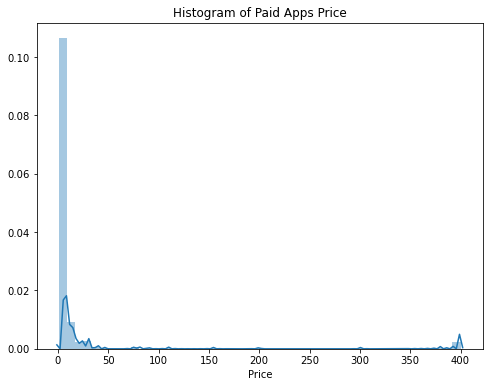

In [26]:
plt.figure(figsize = (8,6))
sns.distplot(df[df['Price'] > 0].Price)
plt.title('Histogram of Paid Apps Price')

Next, we grouped apps based on their price - group paid apps into **4** separate groups: `Very cheap`, `Cheap`, `Expensive`, `Very expensive`, and plot the rating range as well as calculate average rating.

Text(0.5, 1.0, 'Rating Distribution for Different Price Ranges')

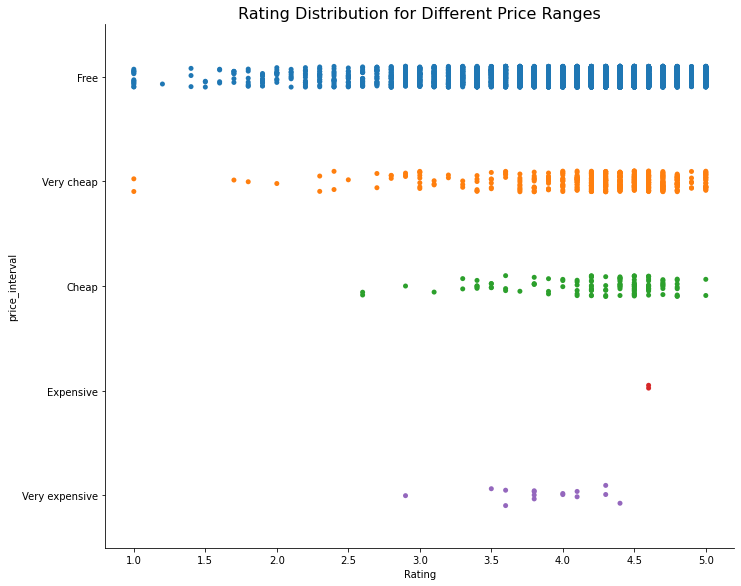

In [27]:
def price_interval(p):
    if p == 0:
        return 'Free'
    elif p > 0 and p <= 5:
        return 'Very cheap'
    elif p > 5 and p <= 50:
        return 'Cheap'
    elif p > 50 and p <= 200:
        return 'Expensive'
    elif p > 200:
        return 'Very expensive'
    else:
        return 'low rating(<4.0)'
df['price_interval'] = df['Price'].map(lambda x: price_interval(x))
sns.catplot(x="Rating", y="price_interval", data=df, height=8, aspect=1.3)
plt.title('Rating Distribution for Different Price Ranges', fontsize = 16)

In [28]:
df[['price_interval', 'Rating']].groupby(['price_interval']).mean().sort_values('Rating')

,Rating
price_interval,
Very expensive,3.866667
Free,4.186203
Cheap,4.250407
Very cheap,4.281065
Expensive,4.600000


We come to find:
- On average, apps with prices under `$5` have higher rating. The high evaluation may be due to better design and a reasonbale price meant for users.
- Very expensive apps have the lowest average rating. It may result from users's unsatisfaction for the unbalance between the very high price and so-so user experience. 
- Therefore, for app developers, they shouldn't set the app price too high, it may take risk of strict evaluation and lower downloads.

For the third question, we plot the bar chart to visualize the price difference in each category.

Category
FINANCE                7.925765
LIFESTYLE              6.180288
MEDICAL                3.110065
EVENTS                 1.718594
FAMILY                 1.234675
PRODUCTIVITY           0.591816
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
PHOTOGRAPHY            0.400627
WEATHER                0.395366
PERSONALIZATION        0.392755
TOOLS                  0.317023
SPORTS                 0.260417
GAME                   0.251136
COMMUNICATION          0.214832
HEALTH_AND_FITNESS     0.197478
MAPS_AND_NAVIGATION    0.196715
TRAVEL_AND_LOCAL       0.193605
PARENTING              0.159667
AUTO_AND_VEHICLES      0.158471
DATING                 0.134316
EDUCATION              0.115128
ART_AND_DESIGN         0.091846
FOOD_AND_DRINK         0.066772
VIDEO_PLAYERS          0.059771
SOCIAL                 0.054136
ENTERTAINMENT          0.053557
SHOPPING               0.021077
NEWS_AND_MAGAZINES     0.014064
LIBRARIES_AND_DEMO     0.011647
COMICS                 0.000000

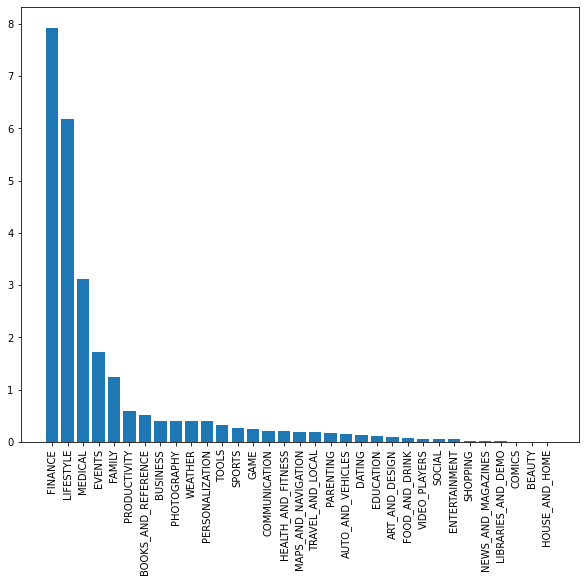

In [29]:
grouped = df['Price'].groupby(df['Category'])
res = grouped.mean().sort_values(ascending=False)
print(res)
plt.figure(figsize = (10,8))
plt.bar(res.index, res.values)
plt.xticks(rotation=90)
plt.show()

We also want to know the price difference only in **paid app**.

Category
FINANCE                170.637059
LIFESTYLE              124.256316
EVENTS                 109.990000
BUSINESS                13.233571
MEDICAL                 13.210642
FAMILY                  12.747539
PRODUCTIVITY             8.961786
PHOTOGRAPHY              6.100455
MAPS_AND_NAVIGATION      5.390000
SOCIAL                   5.323333
PARENTING                4.790000
DATING                   4.490000
AUTO_AND_VEHICLES        4.490000
EDUCATION                4.490000
BOOKS_AND_REFERENCE      4.277500
FOOD_AND_DRINK           4.240000
HEALTH_AND_FITNESS       4.208750
SPORTS                   4.166667
TRAVEL_AND_LOCAL         4.162500
WEATHER                  4.052500
ENTERTAINMENT            3.990000
GAME                     3.461446
TOOLS                    3.426282
COMMUNICATION            3.079259
SHOPPING                 2.740000
VIDEO_PLAYERS            2.615000
NEWS_AND_MAGAZINES       1.990000
ART_AND_DESIGN           1.990000
PERSONALIZATION          1.854940
LIBRA

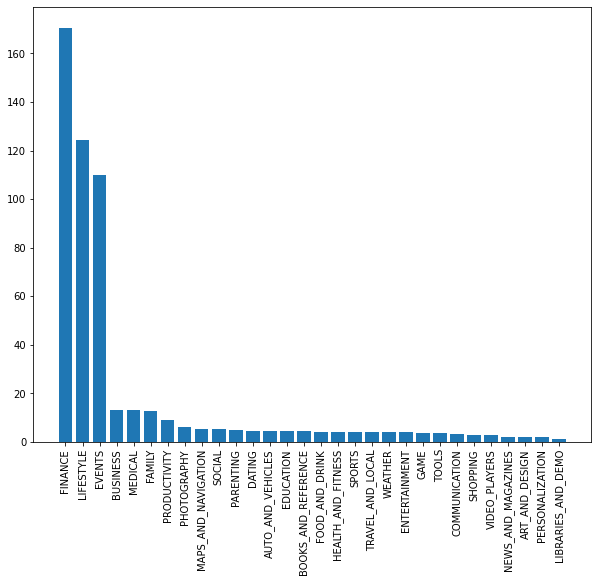

In [30]:
grouped_paid = df['Price'][df['Type'] == 'Paid'].groupby(df['Category'])
res = grouped_paid.mean().sort_values(ascending=False)
print(res)
plt.figure(figsize = (10,8))
plt.bar(res.index, res.values)
plt.xticks(rotation=90)
plt.show()

# App Size Analysis

## 1. Sizes among all apps

We first explore the distribution of app `size`. 

In [31]:
df['Size'].describe()

count    9145.000000
mean       21.516530
std        22.588748
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

From the above statistcs, we can find that in the Google Play Store, **75%** of all apps have size less than or equal to **30 MB**.<br> 
Next, let's visualize disbribution of app size, as well as to explore difference or similarity between `Free` and `Paid` apps.

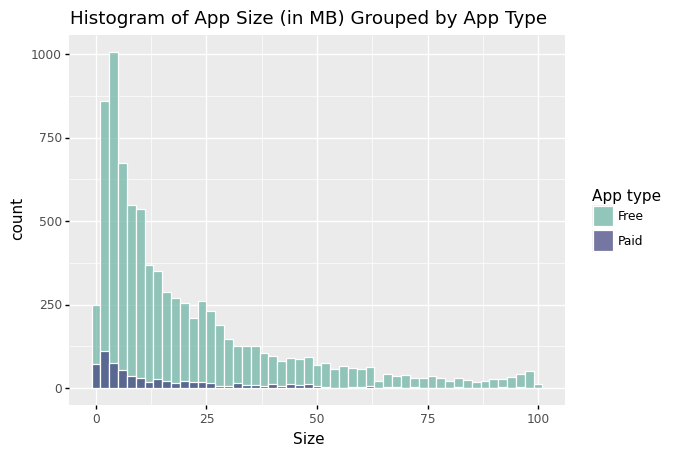

<ggplot: (297932981)>

In [32]:
(ggplot(data = df, mapping = aes(x = 'Size', fill = 'Type')) 
  + geom_histogram(binwidth = 2, color = 'white', alpha = 0.7, position = 'identity') 
  + scale_fill_manual(values = ['#69b3a2', '#404080'])
  + labs(fill = 'App type',title = 'Histogram of App Size (in MB) Grouped by App Type')
)

From the plot above, we can know:
- Both `Free` and `Paid` apps have a large partial of size located at the lower level.
- For `Paid` apps, most of them have size less than or equal to **50 MB**, while `Free` apps have sizes up to **100 MB**.

Then we move to different `categories`. Let's first generate a pivot table for summarizing number of apps, average rating and median installs for different categories.

In [33]:
df_pivot = pd.pivot_table(df, values=['Rating', 'App'], index=['Category'],
                          aggfunc = {'Rating': np.mean,
                                     'App': len}).rename(columns = {'App': 'count',
                                                                    'Rating': 'mean_rating'})
df_pivot.head()

,count,mean_rating
Category,,
ART_AND_DESIGN,65,4.358065
AUTO_AND_VEHICLES,85,4.190411
BEAUTY,53,4.278571
BOOKS_AND_REFERENCE,231,4.346067
BUSINESS,460,4.121452


In [34]:
# Top 10 categories with highest counts of apps
top10_cnt_cat = list(df_pivot.sort_values(by = 'count', ascending = False)[:10].index)
top10_cnt_cat

['FAMILY',
 'GAME',
 'TOOLS',
 'MEDICAL',
 'BUSINESS',
 'PRODUCTIVITY',
 'PERSONALIZATION',
 'COMMUNICATION',
 'SPORTS',
 'LIFESTYLE']

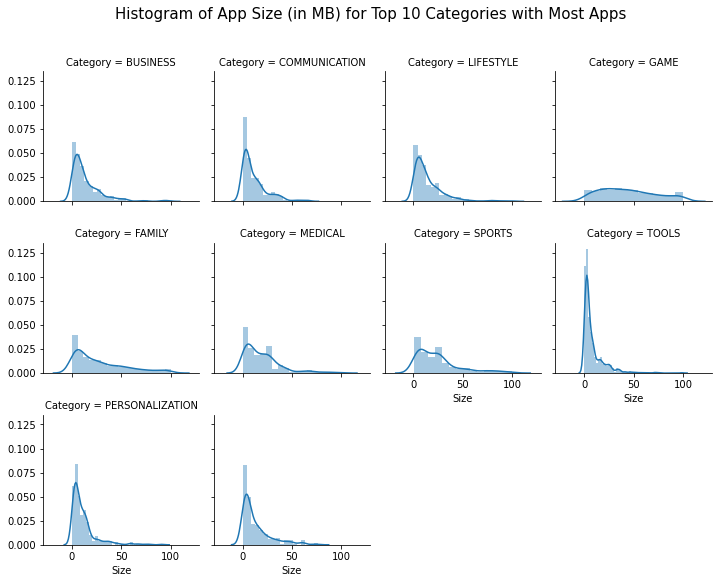

In [35]:
g = sns.FacetGrid(df[df['Category'].isin(top10_cnt_cat)],
                    col='Category', col_wrap = 4, height = 2.5)
g.map(sns.distplot, 'Size')
plt.title('Histogram of App Size (in MB) for Top 10 Categories with Most Apps',
            x = 1, y=4, fontsize = 15)
plt.show()

Most of those categories show a large partial of small app size. It's interesting to see `GAME` and `FAMILY` apps have considerable sizes distributed on the higher level - which is intuitive since those apps commonly load more content and sophiscated designs.

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(1, 0, 'AUTO_AND_VEHICLES'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BOOKS_AND_REFERENCE'),
 Text(4, 0, 'BUSINESS'),
 Text(5, 0, 'COMICS'),
 Text(6, 0, 'COMMUNICATION'),
 Text(7, 0, 'DATING'),
 Text(8, 0, 'EDUCATION'),
 Text(9, 0, 'ENTERTAINMENT'),
 Text(10, 0, 'EVENTS'),
 Text(11, 0, 'FINANCE'),
 Text(12, 0, 'FOOD_AND_DRINK'),
 Text(13, 0, 'HEALTH_AND_FITNESS'),
 Text(14, 0, 'HOUSE_AND_HOME'),
 Text(15, 0, 'LIBRARIES_AND_DEMO'),
 Text(16, 0, 'LIFESTYLE'),
 Text(17, 0, 'GAME'),
 Text(18, 0, 'FAMILY'),
 Text(19, 0, 'MEDICAL'),
 Text(20, 0, 'SOCIAL'),
 Text(21, 0, 'SHOPPING'),
 Text(22, 0, 'PHOTOGRAPHY'),
 Text(23, 0, 'SPORTS'),
 Text(24, 0, 'TRAVEL_AND_LOCAL'),
 Text(25, 0, 'TOOLS'),
 Text(26, 0, 'PERSONALIZATION'),
 Text(27, 0, 'PRODUCTIVITY'),
 Text(28, 0, 'PARENTING'),
 Text(29, 0, 'WEATHER'),
 Text(30, 0, 'VIDEO_PLAYERS'),
 Text(31, 0, 'NEWS_AND_MAGAZINES'),
 Text(32, 0, 'MAPS_AND_NAVIGATION')]

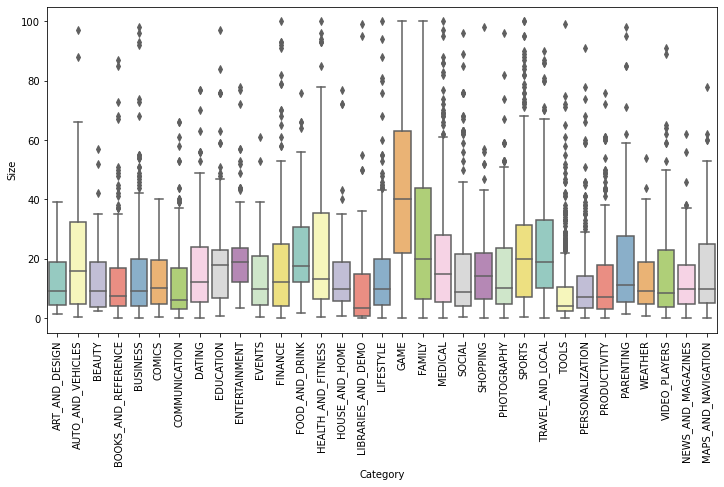

In [36]:
plt.figure(figsize = (12,6))
p = sns.boxplot(x = "Category", y = "Size", data = df, palette = 'Set3')
#p.set_yscale("log")
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
#plt.title()

From the boxplot above, we can know the distribution of app size among all categories. Noticeably, on average, `GAME` apps tend to have larger size compared to other categories.

## 2. What sizes are top-rated apps in?

Now we're going to explore the relationship between app `rating` and `size`. We‘ll first explore on the level of all apps and then focus on different app categories and types.

Text(-0.6, 1.2, 'App rating vs. Size (in MB)')

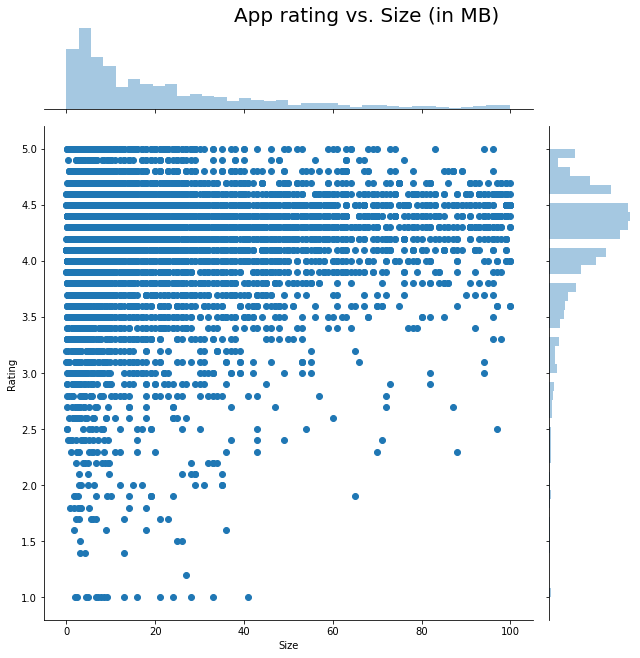

In [37]:
sns.jointplot(x = 'Size', y = 'Rating', data = df, height = 9)
plt.title('App rating vs. Size (in MB)',
          loc='right', x = -.6, y=1.2, fontsize = 20)

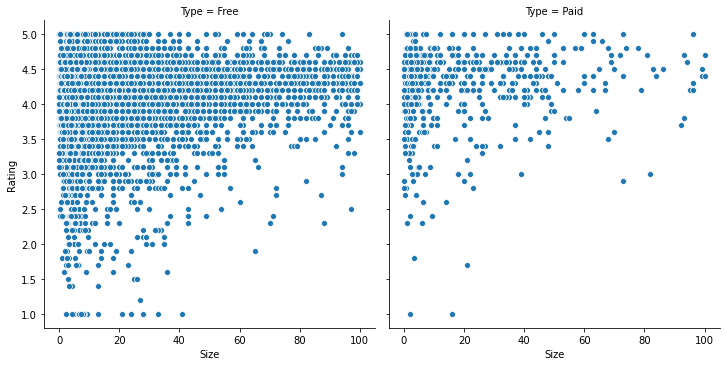

In [38]:
g = sns.FacetGrid(df, col = 'Type', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x = 'Size', y = 'Rating')
g.set_axis_labels('Size', 'Rating')

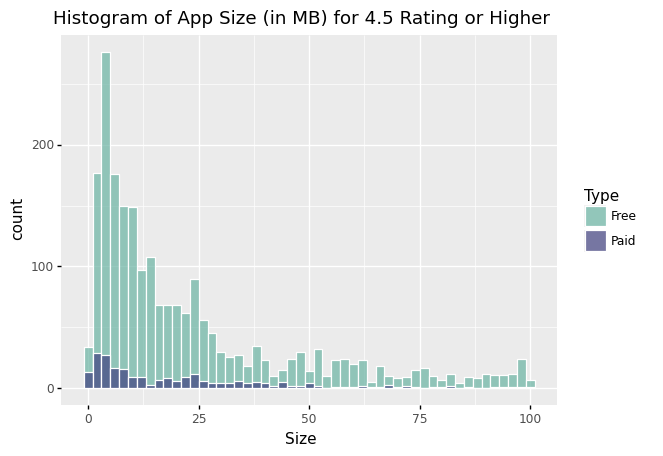

<ggplot: (298317370)>

In [39]:
(ggplot(data = df[df['Rating'] >= 4.5], mapping = aes(x = 'Size', fill = 'Type')) 
  + geom_histogram(binwidth = 2, color = 'white', alpha = 0.7, position = 'identity') 
  + scale_fill_manual(values = ['#69b3a2', '#404080'])
  + labs(title = 'Histogram of App Size (in MB) for 4.5 Rating or Higher')
)

From the plot about the `rating` vs. `size` distribution, we can notice:
- As app size becomes bigger, the rating of the app is tend to be **higher**.
- Most `top-rated apps` are in size of **2MB - 36MB**, which is neither too big nor too small.

Next, we step into TOP 10 categories with highest average rating.

In [40]:
top10_rating_cat = list(df_pivot.sort_values(by = 'mean_rating', ascending = False)[:10].index)
top10_rating_cat

['EVENTS',
 'EDUCATION',
 'ART_AND_DESIGN',
 'BOOKS_AND_REFERENCE',
 'PERSONALIZATION',
 'PARENTING',
 'GAME',
 'BEAUTY',
 'HEALTH_AND_FITNESS',
 'SHOPPING']

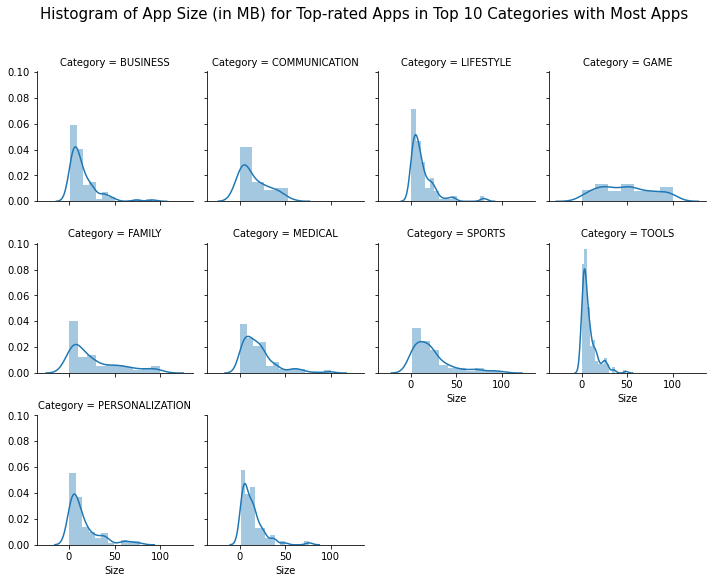

In [41]:
g = sns.FacetGrid(df[df.Rating >= 4.5][df['Category'].isin(top10_cnt_cat)],
                    col='Category', col_wrap = 4, height = 2.5)
g.map(sns.distplot, "Size")
plt.title('Histogram of App Size (in MB) for Top-rated Apps in Top 10 Categories with Most Apps',
            x = 1, y=4, fontsize = 15)
plt.show()

It seems that for most categories, higher `rating` is correlated to a **moderate** app `size`.

## 3. What sizes are top-downloaded apps in?

Next we'll explore the relationship between app `Installs` and `size`. 

In [42]:
df['Installs'].quantile([.5, .75])

0.50     100000.0
0.75    5000000.0
Name: Installs, dtype: float64

Half of the apps in the dataset have been downloaded over `100,000` times. We'll focus on those *Top-downloaded* Apps, which we set a threshold of `100,0000` installs.

[Text(0, 0, '100000'),
 Text(1, 0, '500000'),
 Text(2, 0, '1000000'),
 Text(3, 0, '5000000'),
 Text(4, 0, '10000000'),
 Text(5, 0, '50000000'),
 Text(6, 0, '100000000'),
 Text(7, 0, '500000000'),
 Text(8, 0, '1000000000')]

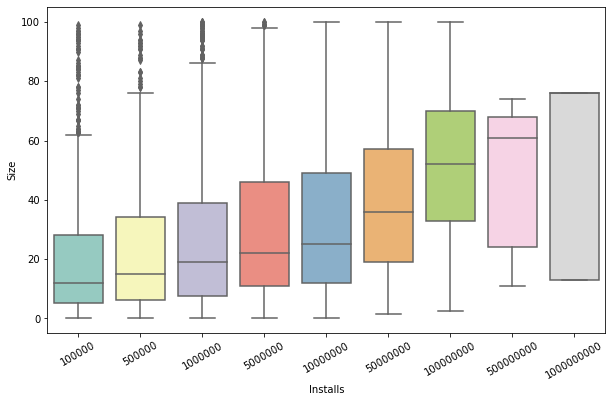

In [43]:
plt.figure(figsize = (10,6))
p = sns.boxplot(x = "Installs", y = "Size", data = df[df['Installs'] >= 10**5], palette = 'Set3')
p.set_xticklabels(p.get_xticklabels(), rotation = 30)
#plt.title()

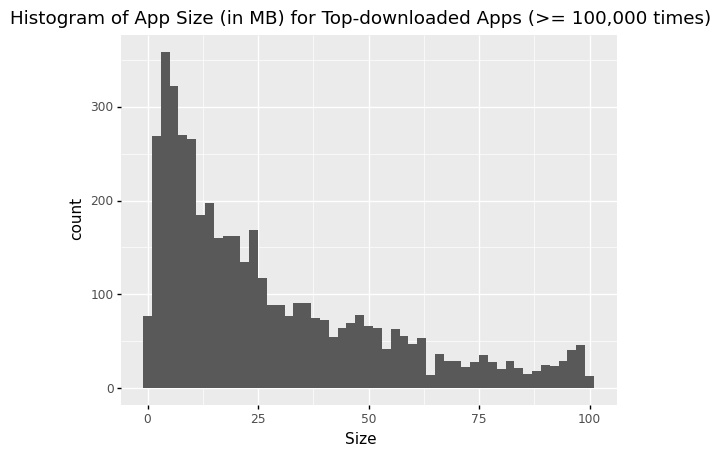

<ggplot: (298310268)>

In [44]:
(ggplot(data = df[df['Installs'] >= 10**5], mapping = aes(x = 'Size')) 
  + geom_histogram(binwidth = 2)
  + labs(title = 'Histogram of App Size (in MB) for Top-downloaded Apps (>= 100,000 times)')
)

For top-downloaded apps, a majority of them are sized below **50 MB**. 

**Overall, through analyzing on app sizes, we come to find:**

- Both `Free` and `Paid` apps have a large partial of size located at the lower level.
- For `Paid` apps, most of them have size less than or equal to **50 MB**, while `Free` apps have sizes up to **100 MB**.
- Most of app categories show a large partial of small app size, while `GAME` and `FAMILY` apps have considerable number of apps to be sized larger.
- As app size becomes bigger, the rating of the app is tend to be higher.
- Most top-rated apps are in size of 2MB - 36MB, which is neither too big nor too small.
- A majority of top-downloaded apps are sized below **50 MB**. 

Therefore, It seems that people tend to download and prefer apps with ligher size. It enlightens app developers to think about optimizing app sizes, especially for apps that are not in category of `GAME` or `FAMILY`.

# Future Work

For the remained question, we'll explore and analyze using the dataset on user views of each Google Play app. Using sentiment polarity data, we can analyze review sentiment differences between categories. We plan to use the reviews text to find out some keywords in reviews that lead to a higher or lower evaluation of an app. Through generating word clouds for positive reviews and negative reviews, we could find the most common words, and especially, display those important factors that lead users to like or dislike an app.

For the first three questions, we'll go deeper and finalize our insights with the most important visulizations. We hope to bring up sufficient recommendations for app developers based on the market analysis. Meanwhile, we're preparing for the final report and presentation.